In [6]:
import numpy as np
import pandas as pd

## Load Dataset

In [7]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(100, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


### Load Image

In [9]:
# Write your code here

from scipy.ndimage import imread

def load_images(filenames):
    images =[]
    
    for filename in filenames:
        image = imread(filename)
        images.append(image)
        
    images = np.array(images) #numpy로 감싸줘야 shape를 계산할 수 있다
    
    return images

In [12]:
filenames = "data/train/" + train["filename"]

X_train = load_images(filenames)
X_train.shape

C:\Users\BKLEE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


(100,)

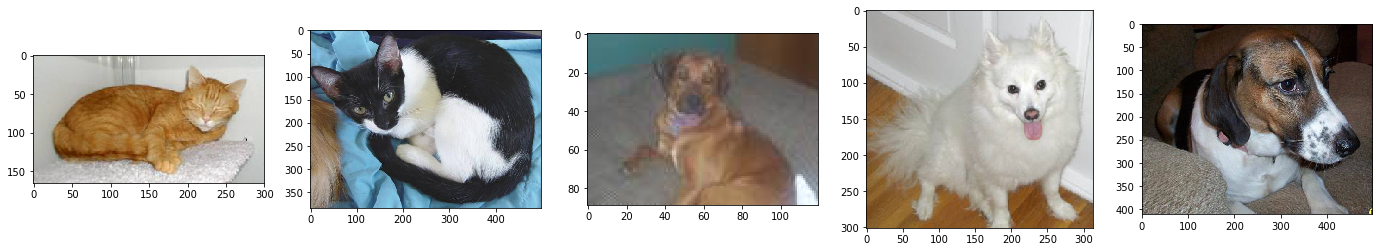

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24,4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

### Resize

In [15]:
from scipy.misc import imresize

def resize_image (original_images, size):
    resized_images=[]
    
    for original_image in original_images:
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    return resized_images

In [40]:
resized_images = resize_image(X_train, size=(512,512))
resized_images.shape

C:\Users\BKLEE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


(100, 512, 512, 3)

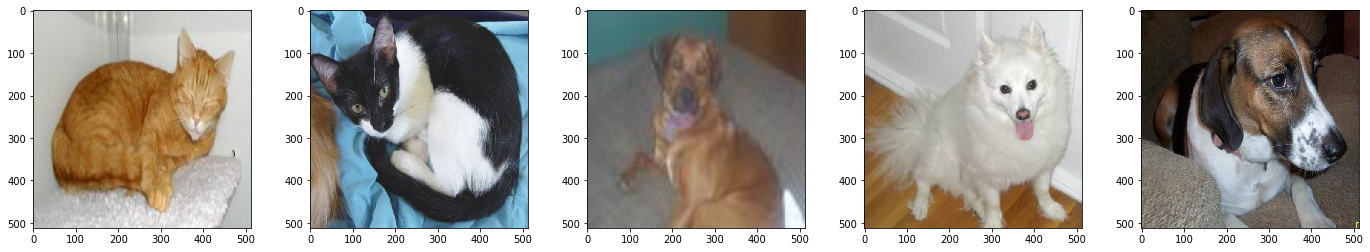

In [41]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24,4)

axes[0].imshow(resized_images[0])
axes[1].imshow(resized_images[1])
axes[2].imshow(resized_images[2])
axes[3].imshow(resized_images[3])
axes[4].imshow(resized_images[4])

### crop

In [42]:
# 기본적으로, 함수를 만들 때 기능을 구현하고 함수로 감싸는 방식으로 구현해야 할 것 같음. 함수를 먼저 정의하고 들어가는 방식은
# 너무 처음부터 생각할 것이 많게 함. 먼저 기능을 구현하고, 거기에 필요한 변수들은 나중에 함수 구현할 때 변수로 들어갈 것들은 삭제하는 방향으로.

def random_crop(image, crop_width, crop_height):
    
    original_width, original_height, _ = image.shape
    
    width_shift = np.random.randint(original_width - crop_width - 1)
    height_shift = np.random.randint(original_height - crop_height - 1)
    
    width_start = width_shift
    width_finish = width_start + crop_width
    
    height_start = height_shift
    height_finish = height_start + crop_height
    
    cropped_image = image[height_start:height_finish,
                         width_start:width_finish,
                         :]
    
    return cropped_image

# crop은 이전 방법들과 달리 data를 늘리는 augmentation의 일종.
# for 문과는 조금 다르다! 그래서 아래 코드가 돌아가지 않음.

In [22]:
cropped_images = random_crop(resized_images, 224, 224)
resized_images.shape

ValueError: too many values to unpack (expected 3)

In [43]:
y_train = train["target"].values
y_train.shape

(100,)

In [44]:
def crop_images(images, labels, crop_width, crop_height, duplicate):
    
    cropped_images=[]
    cropped_labels=[]
    
    for original_image, label in zip(images, labels):
        for _ in range(duplicate):
            cropped_image = random_crop(original_image,
                                       crop_width, crop_height)
            
            cropped_images.append(cropped_image)
            cropped_labels.append(label)
            
        cropped_images = np.array(cropped_images)
        cropped_labels = np.array(cropped_labels)
        
        return cropped_images, cropped_labels

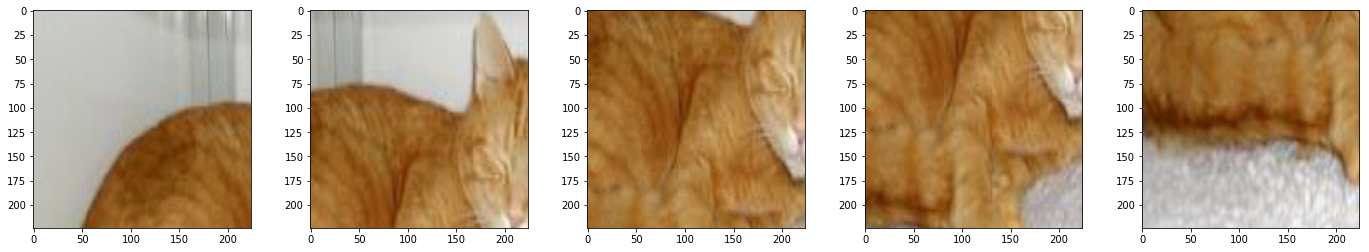

In [45]:
cropped_images_224, _ = crop_images(resized_images, y_train,
                                   224, 224, duplicate = 5)

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(24,4)

axes[0].imshow(cropped_images_224[0])
axes[1].imshow(cropped_images_224[1])
axes[2].imshow(cropped_images_224[2])
axes[3].imshow(cropped_images_224[3])
axes[4].imshow(cropped_images_224[4])

### Flip

In [46]:
# np.fliplr(original_image) 사용!
# augmentation은 숙제로!
#Flip, crop이 중요한 기능이라고 볼 수 있다.

original_image = X_train[0]
flipped_image = np.fliplr(original_image)

original_image.shape, flipped_image.shape

((166, 300, 3), (166, 300, 3))

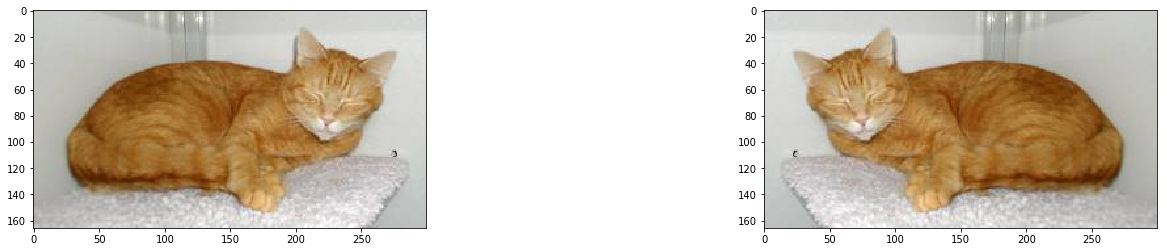

In [47]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(24,4)

axes[0].imshow(original_image)
axes[1].imshow(flipped_image)